In [16]:
import numpy as np
import cunumeric as cun
import subprocess
import os
from tqdm import tqdm
from utils import np_spinodal, cun_spinodal, plot_graph
import matplotlib.pyplot as plt
import legate.timing

In [17]:
start_time = legate.timing.time()
start_time

Running FFT for size: 64 64
Execution time: 0.000039 seconds
---------------------------------------------
Running FFT for size: 128 128
Execution time: 0.000042 seconds
---------------------------------------------
Running FFT for size: 256 256
Execution time: 0.000039 seconds
---------------------------------------------
Running FFT for size: 512 512
Execution time: 0.000056 seconds
---------------------------------------------
Running FFT for size: 1024 1024
Execution time: 0.000095 seconds

In [14]:
arr_sizes = [16, 32, 64, 128, 256, 512, 1024]
NUM_ITER = 8

In [3]:
def run_c_executable(executable_file, Nx, Ny, num_iter, remove_temp = True):
    """
    Run executable file and return the time taken after reading it from the file
    """
    subprocess.call(f"./{executable_file} {Nx} {Ny} {num_iter} > temp.txt", shell=True)
    # Read temp.txt and return the time taken as float value
    with open("temp.txt", "r") as f:
        time_taken = f.read()
    if remove_temp:
        os.remove("temp.txt")
    return float(time_taken)

In [4]:
C_EXECUTABLE = "spinodal_c"

In [5]:
# Temporary run
run_c_executable(C_EXECUTABLE, 100, 100, 10)

1.229

In [6]:
c_fftw_time = []
for size in tqdm(arr_sizes, desc="C_FFTW"):
    time_taken = run_c_executable(C_EXECUTABLE, size, size, NUM_ITER)
    c_fftw_time.append(time_taken)

np_times = []
for size in tqdm(arr_sizes, desc="Numpy"):
    time_taken = np_spinodal(arr_size=size, num_iter = NUM_ITER, 
                             verbose=False)
    np_times.append(time_taken)

cun_times = []
for size in tqdm(arr_sizes, desc="CuNumeric"):
    time_taken = cun_spinodal(arr_size=size, num_iter = NUM_ITER, 
                             verbose=False)
    cun_times.append(time_taken)

CuNumeric: 100%|██████████| 8/8 [00:35<00:00,  4.47s/it]


In [11]:
def plot_graph_l(times, labels, sizes, title,
               x_lim = None,
               y_lim = None,
               show_matrix_size = False):
    for i, time_taken in enumerate(times):
        plt.plot(sizes, time_taken, label=labels[i])
    plt.xlabel('Array Size')
    plt.ylabel('Time (s)')
    if x_lim is not None:
        plt.xlim(x_lim)
    if y_lim is not None:
        plt.ylim(y_lim)
    plt.title(title)
    if show_matrix_size:
        # In x-axis, display the array sizes as 250x250, 500x500, etc.
        plt.xticks(sizes, [f'{size}x{size}' for size in sizes])
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

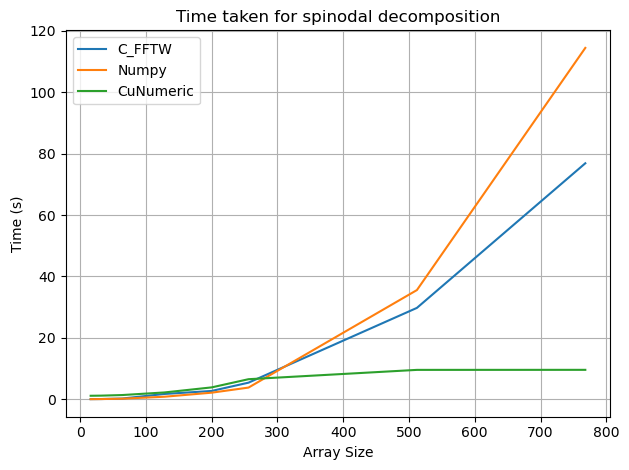

In [13]:
times = [c_fftw_time, np_times, cun_times]
labels = ["C_FFTW", "Numpy", "CuNumeric"]
plot_graph_l(times, labels, arr_sizes,
           "Time taken for spinodal decomposition")

In [1]:
import cunumeric as cu

In [2]:
cu.pi

3.141592653589793